In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1


In [ ]:

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
...

Ellipsis

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Abandono_clientes.csv')
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/Abandono_teste.csv')
df2.head()

,RowNumber;CustomerId;Surname;CreditScore;Geography;Gender;Age;Tenure;Balance;NumOfProducts;HasCrCard;IsActiveMember;EstimatedSalary
0,10001;15798485;Copley;565;France;Male;31;1;0;1...
1,10002;15588959;T'ang;569;France;Male;34;4;0;1;...
2,10003;15624896;Ku;669;France;Female;20;7;0;2;1...
3,10004;15639629;McConnan;694;France;Male;39;4;1...
4,10005;15638852;Ts'ui;504;Spain;Male;28;10;1092...


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Abandono_teste.csv', sep=";")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08
1,10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90
2,10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67
3,10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10
4,10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15


In [ ]:
print(data.shape)

(1000, 13)


In [ ]:
print(data.describe())

          RowNumber    CustomerId  ...  IsActiveMember  EstimatedSalary
count   1000.000000  1.000000e+03  ...     1000.000000       1000.00000
mean   10500.500000  1.569274e+07  ...        0.529000     101500.36066
std      288.819436  7.313593e+04  ...        0.499408      57860.87521
min    10001.000000  1.556586e+07  ...        0.000000        245.50000
25%    10250.750000  1.562966e+07  ...        0.000000      49099.87250
50%    10500.500000  1.569516e+07  ...        1.000000     104081.61000
75%    10750.250000  1.575500e+07  ...        1.000000     151514.41750
max    11000.000000  1.581546e+07  ...        1.000000     199633.73000

[8 rows x 10 columns]


In [ ]:
# shape
print(data.shape)
# head
print(data.head(20))
# descriptions
print(data.describe())
# class distribution
print(data.groupby('IsActiveMember').size())

(1000, 13)
    RowNumber  CustomerId  ... IsActiveMember  EstimatedSalary
0       10001    15798485  ...              1         20443.08
1       10002    15588959  ...              1          4045.90
2       10003    15624896  ...              0        128838.67
3       10004    15639629  ...              1         81293.10
4       10005    15638852  ...              1        187593.15
5       10006    15645057  ...              1         88440.83
6       10007    15687377  ...              1         39824.96
7       10008    15795593  ...              1        161234.90
8       10009    15751848  ...              0        174177.96
9       10010    15702792  ...              0         76589.04
10      10011    15803376  ...              0         28177.11
11      10012    15775248  ...              0         47928.28
12      10013    15773754  ...              1        172106.58
13      10014    15585261  ...              0         59373.38
14      10015    15701459  ...              

In [ ]:
print(data.groupby('NumOfProducts').size())

NumOfProducts
1    519
2    450
3     22
4      9
dtype: int64


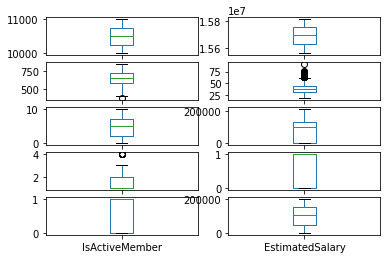

In [ ]:
data.plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False)
pyplot.show()

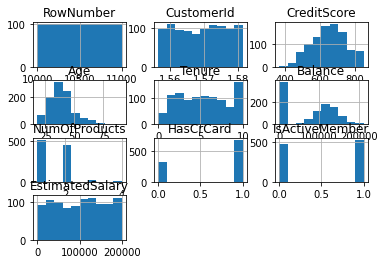

In [ ]:
data.hist()
pyplot.show()

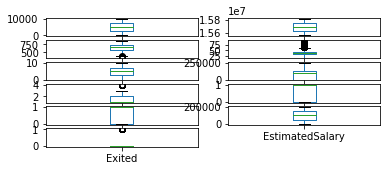

In [ ]:
df1.plot(kind='box', subplots=True, layout=(10,2), sharex=False, sharey=False)
pyplot.show()

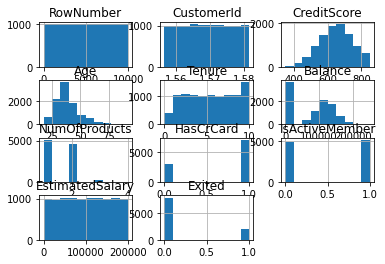

In [ ]:
df1.hist()
pyplot.show()

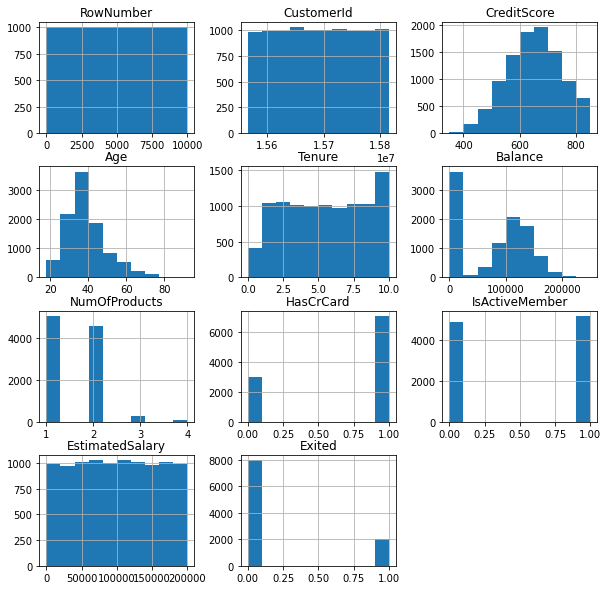

In [ ]:
df1.hist(figsize=(10, 10))
pyplot.show()

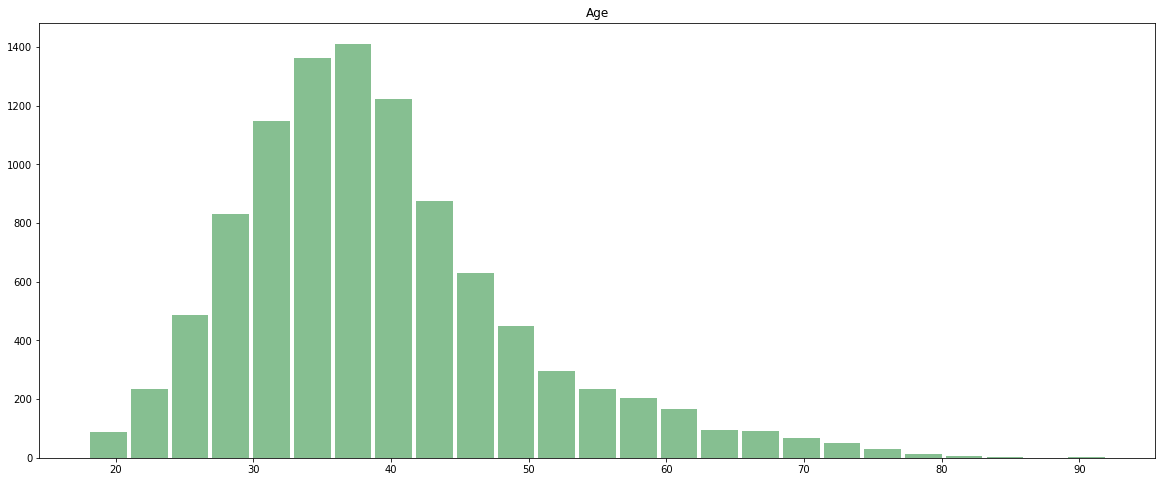

In [ ]:
ax = df1.hist(column='Age', bins=25, grid=False, figsize=(20,8), color='#86bf91', zorder=1, rwidth=0.9)

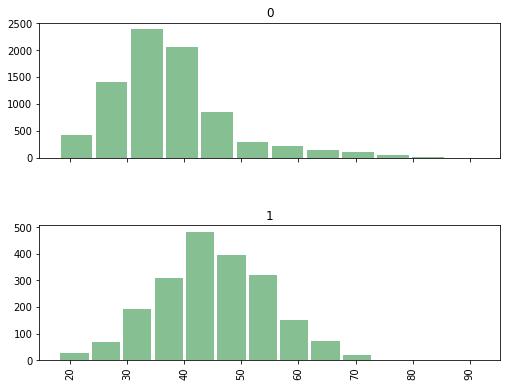

In [ ]:
at = df1.hist(column='Age', by='Exited', bins=12, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

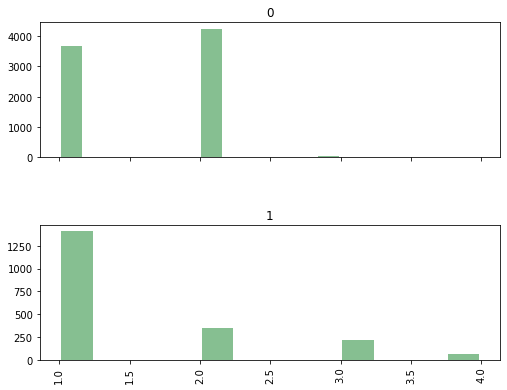

In [ ]:
aj = df1.hist(column='NumOfProducts', by='Exited', bins=12, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

In [ ]:
df3 = df1.drop(columns="Surname")

In [ ]:
df3=df3.drop(columns="CustomerId")

In [ ]:
df3=df3.drop(columns="EstimatedSalary")
df3=df3.drop(columns="Tenure")
df3=df3.drop(columns="Balance")
df3=df3.drop(columns="CreditScore")

In [ ]:
df3=df3.drop(columns="RowNumber")

In [ ]:
df4=df3.drop(columns="Geography")
df4=df4.drop(columns="HasCrCard")
df4=df4.drop(columns="Gender")

In [ ]:
df4.head()

,Age,NumOfProducts,IsActiveMember,Exited
0,42,1,1,1
1,41,1,1,0
2,42,3,0,1
3,39,2,0,0
4,43,1,1,0


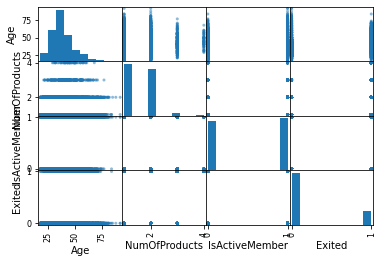

In [ ]:
scatter_matrix(df4)
pyplot.show()

In [ ]:
features = ['Geography', 'Age','NumOfProducts', 'Exited']

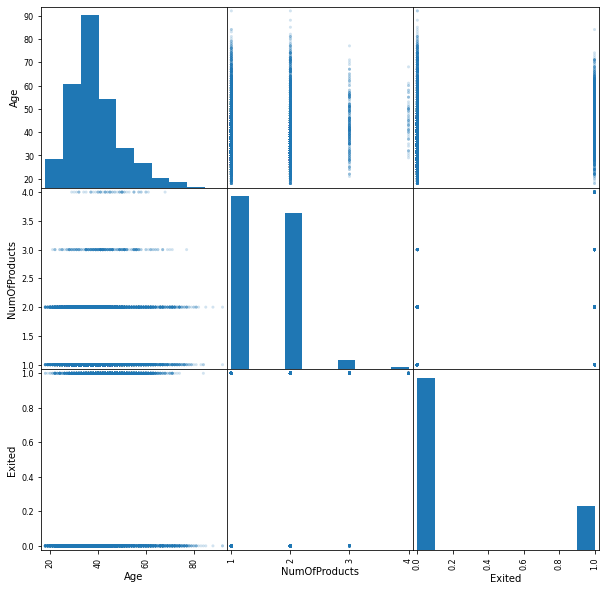

In [ ]:
scatter_matrix(df1[features],alpha=0.2, figsize=(10, 10))
pyplot.show()

In [ ]:
...
# Split-out validation dataset
array = df4.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
print(array)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
df4.to_csv

In [ ]:
dff = pd.read_csv('/content/drive/My Drive/Abandono_clientesFA.csv')
dff.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,11,2,42,2,0.00,1,1,1,101348.88,1
1,608,22,2,41,1,83807.86,1,0,1,112542.58,0
2,502,11,2,42,8,159660.80,3,1,0,113931.57,1
3,699,11,2,39,1,0.00,2,0,0,93826.63,0
4,850,22,2,43,2,125510.82,1,1,1,79084.10,0
5,645,22,1,44,8,113755.78,2,1,0,149756.71,1
6,822,11,1,50,7,0.00,2,1,1,10062.80,0
7,376,33,2,29,4,115046.74,4,1,0,119346.88,1
8,501,11,1,44,4,142051.07,2,0,1,74940.50,0
9,684,11,1,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
dff=dff.drop(columns="CreditScore")
dff=dff.drop(columns="HasCrCard")

In [ ]:
...
# Split-out validation dataset
array = dff.values
X = array[:,0:8]
y = array[:,8]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
dff.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,11,2,42,2,0.00,1,1,101348.88,1
1,22,2,41,1,83807.86,1,1,112542.58,0
2,11,2,42,8,159660.80,3,0,113931.57,1
3,11,2,39,1,0.00,2,0,93826.63,0
4,22,2,43,2,125510.82,1,1,79084.10,0


In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.797250 (0.000500)
LDA: 0.810875 (0.008625)
KNN: 0.766375 (0.009527)
CART: 0.799375 (0.007099)
NB: 0.797875 (0.008460)
SVM: 0.797250 (0.000500)


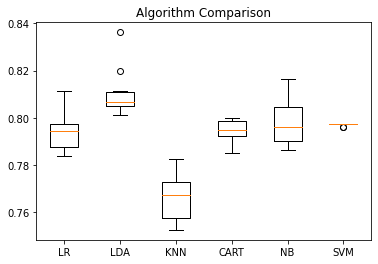

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
dfteste = pd.read_csv('/content/drive/My Drive/abd.csv')
dfteste.head()

,Geography;Gender;Age;Tenure;Balance;NumOfProducts;IsActiveMember;EstimatedSalary
0,11;1;31;1;0;1;1;20443.08
1,11;1;34;4;0;1;1;4045.9
2,11;2;20;7;0;2;0;128838.67
3,11;1;39;4;173255.48;1;1;81293.1
4,22;1;28;10;109291.36;1;1;187593.15


In [ ]:
final_predict = pd.read_csv('/content/drive/My Drive/abd.csv',delimiter=";") 

In [ ]:
final_predict.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,11,1,31,1,0.00,1,1,20443.08
1,11,1,34,4,0.00,1,1,4045.90
2,11,2,20,7,0.00,2,0,128838.67
3,11,1,39,4,173255.48,1,1,81293.10
4,22,1,28,10,109291.36,1,1,187593.15


In [ ]:
final_predict=final_predict.drop(columns="RowNumber")
final_predict=final_predict.drop(columns="CostumerId")
final_predict=final_predict.drop(columns="Surname")

KeyError: ignored

In [ ]:
# Save model to disk
filename = 'Final_Model.sav'
pickle.dump(cart_model, open(filename, 'wb'))

# Load model from disk and use it to make new predictions
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_validation, Y_validation)
print(result)

# Load test dataset
final_predict = numpy.loadtxt("AlivevsDead_Final.csv", delimiter=";")
X_train = final_predict
pred = cart_model.predict(X_train)
print(pred)

In [ ]:
LDA.fit(X_train, Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
final_predict = 

In [ ]:
X_train = final_predict
pred = LDA.predict(X_train)
print(pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:

dfteste=dfteste.drop(columns="HasCrCard")
dfteste=dfteste.drop(columns="Tenure")
dfteste=dfteste.drop(columns="EstimatedSalary")

In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(dfteste)

ValueError: ignored

In [ ]:
dfinal = final_predict

In [ ]:
  dfinal.insert(8, 'Exited', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,])

In [ ]:
dfinal.head(40)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,11,1,31,1,0.00,1,1,20443.08,0
1,11,1,34,4,0.00,1,1,4045.90,0
2,11,2,20,7,0.00,2,0,128838.67,0
3,11,1,39,4,173255.48,1,1,81293.10,0
4,22,1,28,10,109291.36,1,1,187593.15,0
5,11,1,29,4,0.00,2,1,88440.83,0
6,11,1,25,7,159301.00,1,1,39824.96,0
7,33,1,24,5,158484.85,1,1,161234.90,0
8,11,1,45,7,0.00,2,0,174177.96,0
9,11,1,23,8,0.00,2,0,76589.04,0


In [ ]:
from google.colab import files
files.download("dfinal.csv")

FileNotFoundError: ignored

In [ ]:
dfinal.to_csv

<bound method NDFrame.to_csv of      Geography  Gender  Age    Balance  NumOfProducts  IsActiveMember  Exited
0           11       1   31       0.00              1               1       0
1           11       1   34       0.00              1               1       0
2           11       2   20       0.00              2               0       0
3           11       1   39  173255.48              1               1       0
4           22       1   28  109291.36              1               1       0
..         ...     ...  ...        ...            ...             ...     ...
995         11       2   34  118306.79              1               0       0
996         33       1   49  136822.70              1               0       1
997         11       2   74       0.00              1               0       1
998         22       1   23       0.00              2               0       0
999         11       1   46       0.00              2               0       0

[1000 rows x 7 columns]>

In [ ]:
from google.colab import files
dfinal.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>